In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>The raw code for this IPython notebook is by default hidden for easier reading.To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></b>''')

# Meta Analysis of the Datasets for the Epi² pilot project 

---
# lncRNA interaction with proteins

---
# PYTHON 3 / R Notebook
### Adrien Leger / EMBL EBI
### Starting date 18/08/2016

---
## Import general package and definition of specific functions

In [1]:
# Standard lib imports
from glob import glob
from os import remove

# Local lib import
import pycl
import pyBioPlot as pbl

# Third party import
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import scipy.stats as stats

# Pyplot tweaking
%matplotlib inline
pl.rcParams['figure.figsize'] = 30, 10  # that's default image size for this interactive session

# Larger display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Allow to use R directly
%load_ext rpy2.ipython

# Simplify warning reporting to lighten the notebook style 
import warnings
warnings.formatwarning=(lambda message, *args: "{}\n".format(message))

---
## Hendrickson = fRIP with 24 chromatin related protein

***Hendrickson D G, DR Kelley, D Tenen, B Bernstein, JL Rinn. Widespread RNA binding by chromatin-associated proteins.. Genome Biol 17, 28 (2016).***

- Formaldehyde RNA immunoprecipitation of 24 RPB and chromatin related proteins 
- Really detaillled and extensive datasets to have transcriptome wide lncRNA interacting with chromatin.
- Contain all the list of lncRNA gene significantly enriched in captured factions
- Problem = K562 (myelogenous leukemia line) with highly rearranged genomes...
    
=> The data provided will be hard to analyse and cannnot simply be lifovered

=> I would have to re-analign the fastq files at transcript level, compare bound and unbound fractions, call the peaks...

I am not sure that this is worth to do it

---
## Li  / Starbase =  CLIP-Seq data

***JH Li, S Liu, LL Zheng, J Wu, WJ Sun, ZL Wang, H Zhou, LH Qu, JH Yang. Discovery of Protein-lncRNA Interactions by Integrating Large-Scale CLIP-Seq and RNA-Seq Datasets.. Front Bioeng Biotechnol 2, 88 (2014).***

***JH Li, S Liu, H Zhou, LH Qu, JH Yang. starBase v2.0: decoding miRNA-ceRNA, miRNA-ncRNA and protein-RNA interaction networks from large-scale CLIP-Seq data.. Nucleic Acids Res 42, D92-7 (2014).***

- Comprehensive collection of lncRNA protein interaction from 
- Database dates from 2014 => contain datasets up to 2013 = not up to date.
- No specific chromatin protein => have to be crossmatched with protein localization => Done from uniprot = few nuclei pure proteins

**Cross-match Protein location Uniprot with data protein/lncRNA database from Starbase**

Selection of a limited number of candidate CLIP-Seq datasets based on their localization and the experimental conditions:
- Nuclear candidates: ALKBH5, ZC3H7B, FUS, TAF15, hnRNPC, DGCR8, FUS
- Cytoplasmic candidates: AGO1, AGO3, AGO4, FXR1, LIN28B, PUM2

In [70]:
df = pd.read_csv("./Protein_interaction/Li_ClipSeq/Protocol_info/Selected_datasets.csv", sep="\t", index_col=0)
df

,protein,experiment,cell_line,replicate,treatment,localization,author,accession,filepath
Dataset name,,,,,,,,,
HPAR1,FXR1,PAR-CLIP,HEK293,1,"wildtype FXR1, 4-thiouridine, RNase T1",cytosol,ascano,GSE39682,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPTA1,AGO1,PAR-CLIP,HEK293,1,"4-thiouridine, RNase T1",cytosol,hafner,GSE21918,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPTA3,AGO3,PAR-CLIP,HEK293,1,"4-thiouridine, RNase T1",cytosol,hafner,GSE21918,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPTA4,AGO4,PAR-CLIP,HEK293,1,"4-thiouridine, RNase T1",cytosol,hafner,GSE21918,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPTPU,PUM2,PAR-CLIP,HEK293,1,"4-thiouridine, RNase T1",cytosol,hafner,GSE21918,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPTLB,LIN28B,PAR-CLIP,HEK293,1,"4-thiouridine, RNase T1",cytosol,hafner,GSE44615,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPRO6,AGO1,PAR-CLIP,HEK293,1,"4-thiouridine, ML_MM_6",cytosol,memczak,GSE43573,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPRO7,AGO1,PAR-CLIP,HEK293,2,"4-thiouridine, ML_MM_7",cytosol,memczak,GSE43573,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...
HPRO8,AGO1,PAR-CLIP,HEK293,3,"4-thiouridine, ML_MM_8",cytosol,memczak,GSE43573,/home/aleg/Data/Datasets/Epi2_pilot/Protein_in...


### Convert coordinates from hg19 to hg39 with Crossmap and remap on last gencode human genes...

#### Coordinate conversion using CrossMap and a hg19 tp hg38 chain file in BASH

In [2]:
def liftover (input_file, output_file, unmap_file, liftover_chainfile):
    # Conversion of coordinates with Crossmap/liftover
    
    with open (output_file, "w") as output, open(unmap_file, "w") as unmap:
        # Build the command line
        cmd = "CrossMap.py bed {} {}".format(liftover_chainfile, input_file)
        # Write Liftovers coordinates
        for line in pycl.bash(cmd, ret_stdout=True).split("\n"):
            ls = line.split("\t")
            try:
                output.write("{}\t{}\t{}\t{}\t{}\t{}\n".format(ls[7], ls[8], ls[9], ls[10], ls[11], ls[12]))
            except IndexError as E:
                unmap.write(line+"\n")

# Test with one file
pycl.mkdir("./Protein_interaction/Li_ClipSeq/test")
liftover_chainfile = "../../LiftOver_chain_files/hg19ToHg38.over.chain.gz"
input_file = "./Protein_interaction/Li_ClipSeq/Human/HHCD1.bed"
output_file = "./Protein_interaction/Li_ClipSeq/test/HHCD1_converted.bed"
unmap_file = "./Protein_interaction/Li_ClipSeq/test/HHCD1_unmap.bed"
liftover(input_file, output_file, unmap_file, liftover_chainfile)
pycl.head(input_file, 3)
pycl.head(output_file, 3)
pycl.head(unmap_file, 3)

chr1	758393	758417	HHCD1_1_DGCR8_D8.1_3	9	+
chr1	762871	762896	HHCD1_2392_DGCR8_D8.1_5	10	-
chr1	876695	876718	HHCD1_2_DGCR8_D8.1_4	4	+

chr1	823013	823037	HHCD1_1_DGCR8_D8.1_3	9	+
chr1	827491	827516	HHCD1_2392_DGCR8_D8.1_5	10	-
chr1	941315	941338	HHCD1_2_DGCR8_D8.1_4	4	+

chr2	242747383	242747404	HHCD1_30364_DGCR8_D8.1_1	14	-	Fail

Only 2 lines in the file



#### Remap on the human transcriptome with pyBedTools

In [3]:
import pybedtools

def intersect_bed (annotation_file, peak_file, output_file):
    
    # Parse file with pybedtools and intersect the coordinate ranges
    peak = pybedtools.BedTool(peak_file)
    annotation = pybedtools.BedTool(annotation_file)
    intersection = peak.intersect(annotation, wo=True, s=True)
    
    # Reformat the file generated by pybedtools with the merged intervals to a simple Bed format
    init_template=["{chrom}","\t","{start}","\t","{end}","\t","{info}","\t","{score}","\t","{strand}","\t","{chrom2}","\t","{source}","\t","{feature}","\t","{start2}",
                   "\t","{end2}","\t","{score2}","\t","{strand2}","\t","{frame}","\tID=","{ID}",";gene_id=","{gene_id}",";gene_type=","{gene_type}",
                   ";gene_status=","{gene_status}",";gene_name=","{gene_name}",";level=","{level}",";havana_gene=","{havana_gene}","\t","{len}"]
    
    final_template=["{chrom}","\t","{start}","\t","{end}","\t","{gene_id}","|","{gene_name}","|","{gene_type}","|","{len}","\t","{score}","\t","{strand}"]

    pycl.reformat_table(
        input_file=intersection.fn, output_file=output_file, init_template=init_template, final_template=final_template,
        replace_internal_space='_', replace_null_val="-", keep_original_header=False, predicate=lambda v: v["feature"] == "gene", header_from_final_template=True)

# Test with one file
annotation_file = "../../Reference_Annotation/gencode_v24.gff3"
peak_file = "./Protein_interaction/Li_ClipSeq/test/HHCD1_converted.bed"
output_file = "./Protein_interaction/Li_ClipSeq/test/HHCD1_annotated.bed"
intersect_bed (annotation_file, peak_file, output_file)
pycl.linerange(peak_file)
pycl.linerange(output_file)

0	chr1	823013	823037	HHCD1_1_DGCR8_D8.1_3	9	+
1	chr1	827491	827516	HHCD1_2392_DGCR8_D8.1_5	10	-
2	chr1	941315	941338	HHCD1_2_DGCR8_D8.1_4	4	+

58711	chrX	155605820	155605843	HHCD1_57427_DGCR8_D8.1_3	12	+
58712	chrX	155612161	155612184	HHCD1_58704_DGCR8_D8.1_3	2	-
58713	chrX	155615409	155615433	HHCD1_57428_DGCR8_D8.1_3	4	+

0	chrom	start	end	gene_id|gene_name|gene_type|len	score	strand
1	chr1	827491	827516	ENSG00000225880.5|LINC00115|lincRNA|25	10	-
2	chr1	827491	827516	ENSG00000230021.8|RP5-857K21.4|lincRNA|25	10	-

19823	chrX	155227749	155227778	ENSG00000155959.10|VBP1|protein_coding|29	71	+
19824	chrX	155605820	155605843	ENSG00000224533.4|TMLHE-AS1|antisense|23	12	+
19825	chrX	155612161	155612184	ENSG00000185973.10|TMLHE|protein_coding|23	2	-



#### List the uniq gene ids for each samples

for experiment with several samples, the function only retain those in **common in ALL the replicates**

In [4]:
def unique_genes_list (input_file_list, output_file):

    gene_dict = {}

    # iterate on replicates of the same experiment
    for input_file in input_file_list:
        df = pd.read_csv(input_file, sep="[\t|]", engine='python')

        # iterate on lines of a replicate bed file
        for gene_id, gene_df in df.groupby("gene_id"):
            if gene_id not in gene_dict:
                gene_dict[gene_id] = {
                    "gene_name":gene_df["gene_name"].unique()[0],
                    "gene_type":gene_df["gene_type"].unique()[0],
                    "all_count":0, "rep_count":0}
            gene_dict[gene_id]["all_count"]+=len(gene_df)
            gene_dict[gene_id]["rep_count"]+=1

    # Write the valid gene entries in a file 
    with open (output_file, "w") as output:
        output.write("gene_id\tgene_name\tgene_type\tall_count\trep_count\n")
        for gene_id, val in gene_dict.items():
            if val["rep_count"] == len(input_file_list):
                output.write("{}\t{}\t{}\t{}\t{}\n".format(gene_id, val["gene_name"], val["gene_type"], val["all_count"], val["rep_count"]))
            
# Test with one file
input_file = ["./Protein_interaction/Li_ClipSeq/test/HCTA1_annotated.bed"]
output_file = "./Protein_interaction/Li_ClipSeq/test/HCTA1_uniq_gene.tsv"
unique_genes_list(input_file, output_file)
pycl.linerange(output_file)

# Test with a list of files
input_file = [ "./Protein_interaction/Li_ClipSeq/test/HCTA1_annotated.bed", "./Protein_interaction/Li_ClipSeq/test/HHCD1_annotated.bed"]
output_file = "./Protein_interaction/Li_ClipSeq/test/HHMF1-3_uniq_gene.tsv"
unique_genes_list(input_file, output_file)
pycl.linerange(output_file)

0	gene_id	gene_name	gene_type	all_count	rep_count
1	ENSG00000141101.12	NOB1	protein_coding	7	1
2	ENSG00000170677.5	SOCS6	protein_coding	1	1

8141	ENSG00000135829.16	DHX9	protein_coding	8	1
8142	ENSG00000169223.14	LMAN2	protein_coding	1	1
8143	ENSG00000149925.16	ALDOA	protein_coding	11	1

0	gene_id	gene_name	gene_type	all_count	rep_count
1	ENSG00000170677.5	SOCS6	protein_coding	2	2
2	ENSG00000034053.14	APBA2	protein_coding	5	2

3250	ENSG00000258472.8	RP11-192H23.4	protein_coding	18	2
3251	ENSG00000105662.15	CRTC1	protein_coding	2	2
3252	ENSG00000169223.14	LMAN2	protein_coding	3	2



#### Merge the replicates of the same experiment 

### Iterate on all the files listed in the sample list and apply hg38 coordinate conversion, gencodev24 annotation and listing of unique genes  

In [20]:
liftover_chainfile = "../../LiftOver_chain_files/hg19ToHg38.over.chain.gz"
annotation_file = "../../Reference_Annotation/gencode_v24.gff3"
intermediate_folder = "./Protein_interaction/Li_ClipSeq/selected_datasets/"
final_folder = "./Protein_interaction/Li_ClipSeq/final_datasets/"
pycl.mkdir(intermediate_folder)
pycl.mkdir(final_folder)

# df containing the sample list details
df = pd.read_csv("./Protein_interaction/Li_ClipSeq/Protocol_info/Selected_datasets.csv", sep="\t", index_col=0)

# dict to count the file of the different dataset and experiments
dataset_dict = {}
exp_dict = {}

# Iterate by all sample of the same esperiment (include replicates if there are some replicates)
for (prot,exp, cl, loc, aut), exp_df in df.groupby(["protein","experiment", "cell_line", "localization", "author"]):
    exp_id = "{}_{}_{}_{}_{}".format(prot,exp, cl, loc, aut)
    print("Analysis experiment ", exp_id)
    intersect_file_list=[]
    
    # Iterate on the replicates of the same experiment
    for dataset_id, line in exp_df.iterrows():

        print("\tAnalysis dataset {}".format(dataset_id))
        input_file = line["filepath"]
        
        print ("\t\tConverting coordinates with liftover")
        converted_file = "{}{}_coord_hg38.bed".format(intermediate_folder, dataset_id) 
        unmap_file = "{}{}_unmap.bed".format(intermediate_folder, dataset_id) 
        liftover(input_file, converted_file, unmap_file, liftover_chainfile)

        print ("\t\tIntersect with annotation file")
        intersect_file = "{}{}_coord_hg38_annot_gencode24.bed".format(intermediate_folder, dataset_id)
        intersect_file_list.append (intersect_file)
        intersect_bed (annotation_file, converted_file, intersect_file)
        
        # Fill the counter
        dataset_dict[dataset_id] = {
            "Init_sites":pycl.simplecount(input_file),
            "Converted_coord_sites": pycl.simplecount(converted_file),
            "Unmap_sites": pycl.simplecount(unmap_file),
            "Annotated_sites": pycl.simplecount(intersect_file)}
    
    # list uniq genes for each experiment. Replicate experiment and inner-joined before    
    print ("\tList uniq genes")
    unique_gene_file = "{}{}_uniq_genes.tsv".format(final_folder, exp_id) 
    unique_genes_list (intersect_file_list, unique_gene_file)
    exp_dict[exp_id] = {
        "Uniq_genes": pycl.simplecount(unique_gene_file),
        "Replicate_Number": len(intersect_file_list)}


Analysis experiment  AGO1_PAR-CLIP_HEK293_cytosol_hafner
	Analysis dataset HPTA1
		Converting coordinates with liftover
		Intersect with annotation file
	List uniq genes
Analysis experiment  AGO1_PAR-CLIP_HEK293_cytosol_memczak
	Analysis dataset HPRO6
		Converting coordinates with liftover
		Intersect with annotation file
	Analysis dataset HPRO7
		Converting coordinates with liftover
		Intersect with annotation file
	Analysis dataset HPRO8
		Converting coordinates with liftover
		Intersect with annotation file
	List uniq genes
Analysis experiment  AGO3_PAR-CLIP_HEK293_cytosol_hafner
	Analysis dataset HPTA3
		Converting coordinates with liftover
		Intersect with annotation file
	List uniq genes
Analysis experiment  AGO4_PAR-CLIP_HEK293_cytosol_hafner
	Analysis dataset HPTA4
		Converting coordinates with liftover
		Intersect with annotation file
	List uniq genes
Analysis experiment  ALKBH5_PAR-CLIP_HEK293_nucleus_baltz
	Analysis dataset HPLAL
		Converting coordinates with liftover
		Inte

In [21]:
pycl.dict_to_html(dataset_dict)

,Annotated_sites,Converted_coord_sites,Init_sites,Unmap_sites
HHCD1,19826,58714,58704,2
HHCD2,76848,124378,124354,5
HHMF1,191972,325659,326115,546
HHMF2,258589,414603,415091,624
HHMF3,269695,471039,471590,681
HIUHC,429723,438395,438360,30
HIUHN,23473,24446,24448,5
HPAR1,8405,9017,9017,2
HPHFW,37719,39988,39983,1
HPHTA,8582,8678,8677,1


In [22]:
pycl.dict_to_html(exp_dict)

,Replicate_Number,Uniq_genes
AGO1_PAR-CLIP_HEK293_cytosol_hafner,1,5962
AGO1_PAR-CLIP_HEK293_cytosol_memczak,3,1603
AGO3_PAR-CLIP_HEK293_cytosol_hafner,1,8181
AGO4_PAR-CLIP_HEK293_cytosol_hafner,1,2337
ALKBH5_PAR-CLIP_HEK293_nucleus_baltz,1,1184
DGCR8_HITS-CLIP_HEK293_nucleus_macias,2,8073
FUS_HITS-CLIP_Brain_nucleus_nakaya,3,18024
FUS_PAR-CLIP_HEK293_nucleus_hoell,1,8310
FXR1_PAR-CLIP_HEK293_cytosol_ascano,1,2824
LIN28B_PAR-CLIP_HEK293_cytosol_hafner,1,10080


### Further dataset analysis

**It might also be interesting to have a set of core generic RNA associated with nuclear or cytoplasmic candidates. To do so, I need to intersect the data irrespective of their cell line**
**I will create several datasets**

* RNA found only in at least one nuclear proteins but no cytoplasmic proteins
* RNA found only in at least one cytoplasmic proteins but no nuclear proteins
* RNA found in all nuclear proteins but no cytoplasmic protein
* RNA found in all cytoplasmic proteins but no nuclear protein

In [8]:
pycl.linerange("./Protein_interaction/Li_ClipSeq/final_datasets/AGO1_PAR-CLIP_HEK293_cytosol_hafner_uniq_genes.tsv")

0	gene_id	gene_name	gene_type	all_count	rep_count
1	ENSG00000137807.13	KIF23	protein_coding	2	1
2	ENSG00000272305.5	RP11-894J14.5	protein_coding	1	1

5959	ENSG00000247315.3	ZCCHC3	protein_coding	2	1
5960	ENSG00000105401.6	CDC37	protein_coding	1	1
5961	ENSG00000109586.11	GALNT7	protein_coding	2	1



In [14]:
input_folder = "./Protein_interaction/Li_ClipSeq/final_datasets/"
output_file = "./Protein_interaction/Li_ClipSeq/final_datasets/ALL_dataset_uniq_genes.tsv"
remove(output_file)
# dict to count the file of the different categorie
gene_loc_dict = {}

for input_file in glob(input_folder+"*tsv"):
    sample_name = pycl.file_basename(input_file)
    print("Analysis dataset ", sample_name)
    
    localization = sample_name.split("_")[3]
    unique_gene_df = pd.read_csv(input_file, sep="\t", index_col=0)
    
    for gene_id, gene_line in unique_gene_df.iterrows():
        if gene_id not in gene_loc_dict:
            gene_loc_dict[gene_id] = {"gene_name": gene_line["gene_name"] ,"gene_type":gene_line["gene_type"] ,"cytosol":0, "nucleus":0}
        gene_loc_dict[gene_id][localization] += 1

# Write results in a file
with open (output_file, "w") as output:
    output.write("gene_id\tgene_name\tgene_type\tcytosol_protein\tnuclear_protein\tnuclearness\n")
    for gene_id, val in gene_loc_dict.items():
        output.write("{}\t{}\t{}\t{}\t{}\t{}\n".format(gene_id,val["gene_name"],val["gene_type"],val["cytosol"],val["nucleus"],val["nucleus"]-val["cytosol"]))

pycl.linerange(output_file)

Analysis dataset  TAF15_PAR-CLIP_HEK293_nucleus_hoell_uniq_genes
Analysis dataset  AGO4_PAR-CLIP_HEK293_cytosol_hafner_uniq_genes
Analysis dataset  FUS_PAR-CLIP_HEK293_nucleus_hoell_uniq_genes
Analysis dataset  ALKBH5_PAR-CLIP_HEK293_nucleus_baltz_uniq_genes
Analysis dataset  hnRNPC_iCLIP_HeLa_nucleus_zarnack_uniq_genes
Analysis dataset  AGO1_PAR-CLIP_HEK293_cytosol_memczak_uniq_genes
Analysis dataset  AGO3_PAR-CLIP_HEK293_cytosol_hafner_uniq_genes
Analysis dataset  LIN28B_PAR-CLIP_HEK293_cytosol_hafner_uniq_genes
Analysis dataset  ZC3H7B_PAR-CLIP_HEK293_nucleus_baltz_uniq_genes
Analysis dataset  hnRNPC_iCLIP_HeLa_nucleus_konig_uniq_genes
Analysis dataset  AGO1_PAR-CLIP_HEK293_cytosol_hafner_uniq_genes
Analysis dataset  FUS_HITS-CLIP_Brain_nucleus_nakaya_uniq_genes
Analysis dataset  PUM2_PAR-CLIP_HEK293_cytosol_hafner_uniq_genes
Analysis dataset  DGCR8_HITS-CLIP_HEK293_nucleus_macias_uniq_genes
Analysis dataset  FXR1_PAR-CLIP_HEK293_cytosol_ascano_uniq_genes
0	gene_id	gene_name	gene_ty

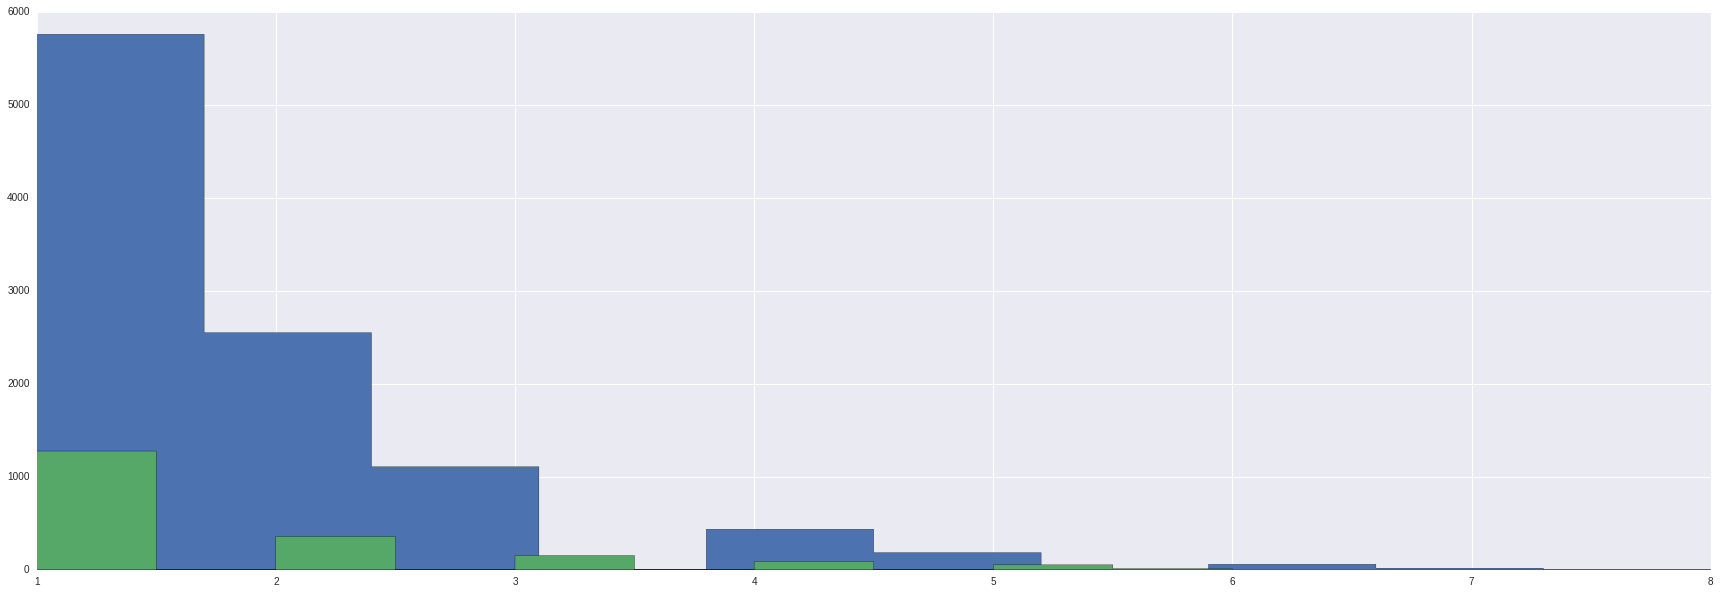

In [6]:
# Create a distribution graph to identify the number of pure nuclear interacting or pure cytosol interacting RNAs  
distrib_nucleus = []
distrib_cytosol = []
for gene_id, val in gene_loc_dict.items():
    if not val["nucleus"]:
        distrib_cytosol.append(val["cytosol"])
    elif not val["cytosol"]:
        distrib_nucleus.append(val["nucleus"])

distrib_nucleus.sort()
distrib_cytosol.sort()
p= pl.hist(distrib_nucleus,align="mid", histtype="stepfilled")
p= pl.hist(distrib_cytosol,align="mid", histtype="stepfilled")

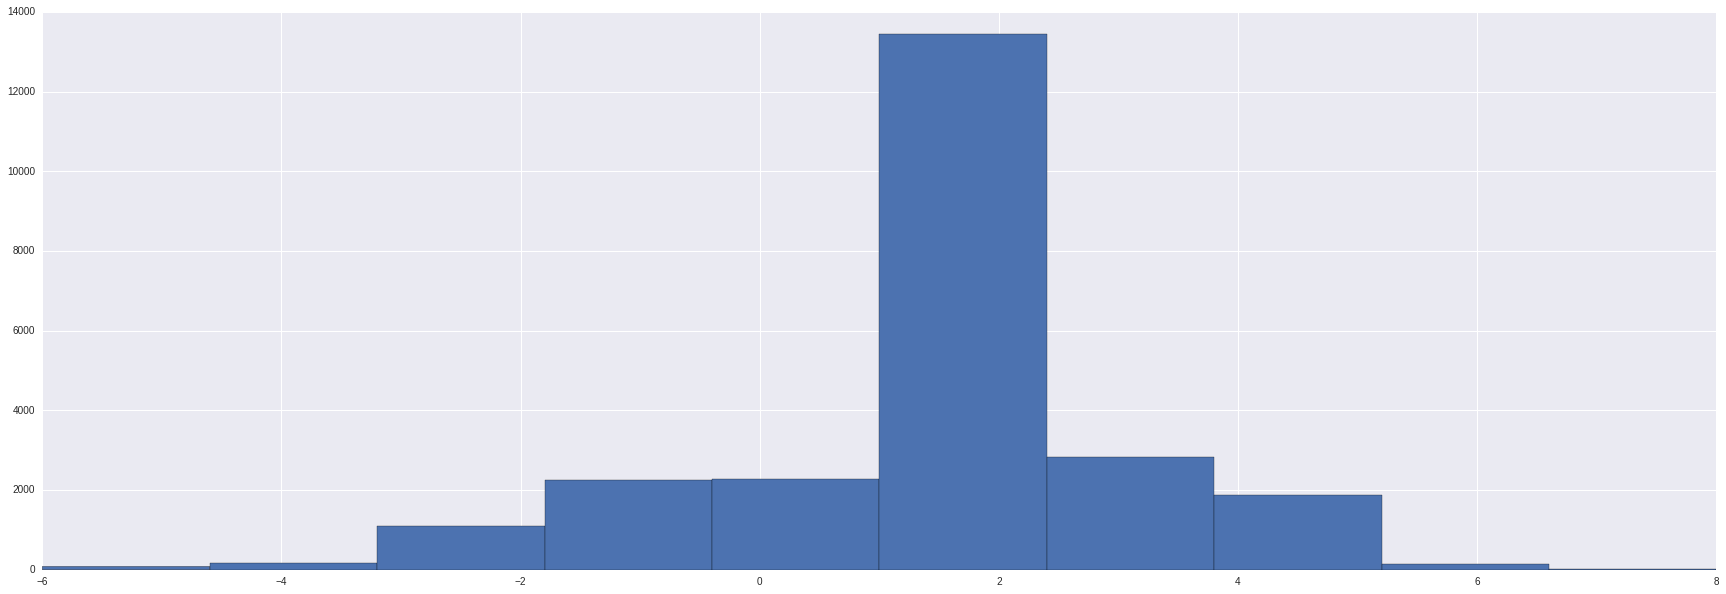

In [16]:
# Create a distribution graph to identify the number of pure nuclear interacting or pure cytosol interacting RNAs  
distrib_nuclearness = sorted([val["nucleus"]-val["cytosol"] for val in gene_loc_dict.values()])
p= pl.hist(distrib_nuclearness)